In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysd
from SALib.sample import saltelli
from SALib.analyze import sobol
import scipy as sp

# Load Calibration data

In [3]:
data = pd.read_csv("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/data/dynamic/calibration_incidence.csv", sep=',',decimal='.')
data=data.drop("Unnamed: 0",axis=1)
data.head()

,year,var,Lower,Mean,Upper
0,2000,e_inc_num,56000,139000,259000
1,2001,e_inc_num,57000,159000,312000
2,2002,e_inc_num,57000,175000,357000
3,2003,e_inc_num,54000,206000,456000
4,2004,e_inc_num,54000,221000,501000


Text(0.5, 1.0, 'Estimated Incident cases of TB')

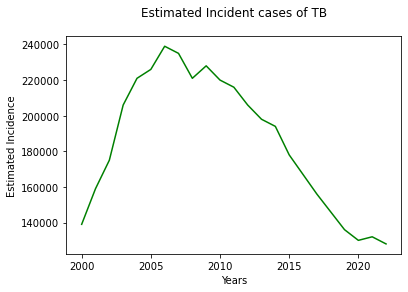

In [5]:
plt.plot(data["year"], data['Mean'],label="mean_estimate",color="green")
#plt=dataSoil.plot(x="days",y="bacteria_measured")
plt.xlabel('Years')
plt.ylabel('Estimated Incidence')
plt.title("Estimated Incident cases of TB",pad=20)

# Load Model

In [8]:
model = pysd.read_vensim("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/model/transmission/V4.mdl")

In [9]:
model_output = model.run()
display(model_output.head(5))

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,total pop,birth rate,births,infection,CFR,deaths A,...,Active,CDR,Detected and Treated TB,Detection,relapse rate,Susceptible,Relapse,force of infection,progression,progression rate
2000,2023,2000,1,1,3.049400e+07,0.035,1.067290e+06,683.741064,0,1112.000000,...,139000.000000,0.46,55000.000000,63940.000000,0.001,3.000000e+07,55.000000,0.005,3000.000000,0.01
2001,2023,2000,1,1,3.131734e+07,0.035,1.096107e+06,378.981950,0,616.024000,...,77003.000000,0.46,118445.000000,35421.380000,0.001,3.082661e+07,118.445000,0.005,2952.837411,0.01
2002,2023,2000,1,1,3.216291e+07,0.035,1.125702e+06,216.849168,0,352.295027,...,44036.878411,0.46,152800.375000,20256.964069,0.001,3.167572e+07,152.800375,0.005,2903.476157,0.01
2003,2023,2000,1,1,3.303130e+07,0.035,1.156096e+06,130.481155,0,211.871167,...,26483.895846,0.46,171682.135694,12182.592089,0.001,3.254780e+07,171.682136,0.005,2853.382078,0.01
2004,2023,2000,1,1,3.392315e+07,0.035,1.187310e+06,84.362254,0,136.915974,...,17114.496803,0.46,182319.588562,7872.668530,0.001,3.344338e+07,182.319589,0.005,2803.326012,0.01


<AxesSubplot:>

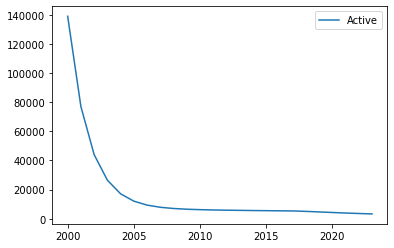

In [11]:
model_output.plot(y="Active")

# Calibration

In [ ]:
#Set up observable and claibration parameter
observable = "Mortality due to diarrhoea"
parameter1 = 'gdp delay'
parameter2 = 'Gdp fractional effect'
parameter4="General Rate of disease"
parameter5="Rate of death untreated"
parameter6 = 'Gdp fractional effect 2'


def error(param_list):
    #unpack the parameter list
    parameter1_value, parameter2_value,parameter4_value,parameter5_value,parameter6_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'gdp delay':parameter1_value,
                               'Gdp fractional effect':parameter2_value,
                               "General Rate of disease":parameter4_value,
                               "Rate of death untreated":parameter5_value,
                               'Gdp fractional effect 2':parameter6_value,
                              },
                       return_columns=['Mortality due to diarrhoea'],
                       return_timestamps=list(mortality.index.values))
    #return the sum of the squared errors
    return sum((result['Mortality due to diarrhoea'] - mortality['mean'])**2)